In [3]:
import numpy 
import statsmodels.api as sm
import pandas as pd
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0) 
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [4]:
y = df.Employed  # response
X = df.GNP  # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

C:\Users\shakib\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,GNP
1947,1.0,234.289
1948,1.0,259.426
1949,1.0,258.054
1950,1.0,284.599
1951,1.0,328.975


In [5]:
est=sm.OLS(y, X)

In [6]:
est = est.fit()
est.summary()

C:\Users\shakib\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           8.36e-12
Time:                        03:04:17   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
est.params

const    51.843590
GNP       0.034752
dtype: float64

Populating the interactive namespace from numpy and matplotlib


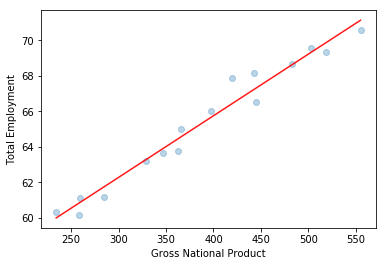

In [9]:
# Make sure that graphics appear inline in the iPython notebook
%pylab inline
# We pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(X.GNP.min(), X.GNP.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime) # add constant as we did before
# Now we calculate the predicted values
y_hat = est.predict(X_prime)
plt.scatter(X.GNP, y, alpha=0.3) # Plot the raw data
plt.xlabel("Gross National Product")
plt.ylabel("Total Employment")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9) # Add the regression line, colored in red
#Populating the interactive namespace from numpy and matplotlib

In [10]:
# import formula api as alias smf
import statsmodels.formula.api as smf
# formula: response ~ predictors
est = smf.ols(formula='Employed ~ GNP', data=df).fit()
est.summary()

C:\Users\shakib\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           8.36e-12
Time:                        03:05:02   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\shakib\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


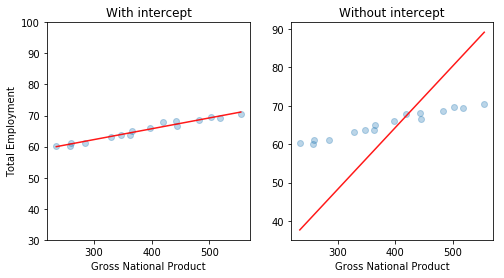

In [11]:
# Fit the no-intercept model
est_no_int = smf.ols(formula='Employed ~ GNP - 1', data=df).fit()
# We pick 100 hundred points equally spaced from the min to the max
X_prime_1 = pd.DataFrame({'GNP': np.linspace(X.GNP.min(), X.GNP.max(), 100)})
X_prime_1 = sm.add_constant(X_prime_1) # add constant as we did before
y_hat_int = est.predict(X_prime_1)
y_hat_no_int = est_no_int.predict(X_prime_1)
fig = plt.figure(figsize=(8,4))
splt = plt.subplot(121)
splt.scatter(X.GNP, y, alpha=0.3) # Plot the raw data
plt.ylim(30, 100) # Set the y-axis to be the same
plt.xlabel("Gross National Product")
plt.ylabel("Total Employment")
plt.title("With intercept")
splt.plot(X_prime[:, 1], y_hat_int, 'r', alpha=0.9) # Add the regression line, colored in red
splt = plt.subplot(122)
splt.scatter(X.GNP, y, alpha=0.3) # Plot the raw data
plt.xlabel("Gross National Product")
plt.title("Without intercept")
splt.plot(X_prime[:, 1], y_hat_no_int, 'r', alpha=0.9) # Add the regression line, colored in red